In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=["salary_year_avg"])

In [4]:
job_titles = df_US['job_title'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

In [5]:
df_US_top6 = df_US[df_US["job_title"].isin(job_titles)]

In [9]:
job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

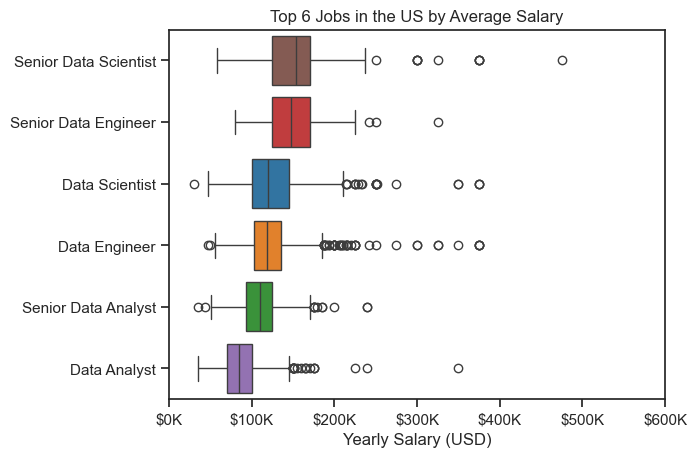

In [13]:
sns.boxplot(
    data=df_US_top6,
    x="salary_year_avg",
    y="job_title_short",
    order=job_order,
    hue="job_title_short",
    dodge=False,
    palette="tab10",
)
sns.set_theme(style="ticks")

plt.title("Top 6 Jobs in the US by Average Salary")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600_000)
ticks_X = plt.FuncFormatter(lambda y, _: f"${int(y/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_X)
plt.show()

### Investigate Median Salary Vs Skill for Data Analysts

In [14]:
df_DA_US = df[(df["job_country"] == "United States") & (df["job_title_short"] == "Data Analyst")].copy()

df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [16]:
df_DA_US = df_DA_US.explode("job_skills")

df_DA_US[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [17]:
df_DA_top_pay = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(
    "median", ascending=False
).head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [20]:
df_DA_skills = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False).head(10)

df_DA_skills = df_DA_skills.sort_values(by="median", ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


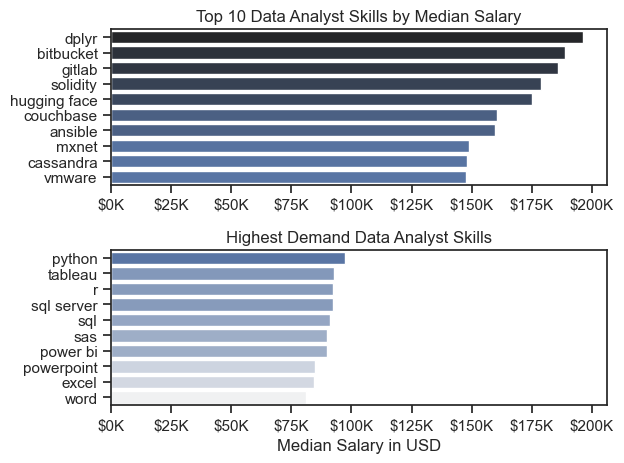

In [24]:
fig, ax = plt.subplots(2, 1)

sns.set_theme

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(
    data=df_DA_top_pay,
    x="median",
    y=df_DA_top_pay.index,
    ax=ax[0],
    hue="median",
    palette="dark:b_r",
    legend=False,
)

# df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Data Analyst Skills by Median Salary")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

sns.barplot(
    data=df_DA_skills,
    x="median",
    y=df_DA_skills.index,
    ax=ax[1],
    hue="median",
    palette="light:b",
    legend=False,
)

# df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Highest Demand Data Analyst Skills")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel("Median Salary in USD")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

fig.tight_layout()
plt.show()